# OpenCV Image Classifier for Kitesurfing 

Tracking cameras are getting very popular. One example is the [Soloshot](https://shop.soloshot.com/), which is a camera, gimball, and tracking software system that follows a sports player. A similar solution is quadcopter [follow me mode](http://www.dji.com/intelligent-flight-modes#gsSmart) in which the drone will track a moving person. I've been thinking about building a tracking camera for Kitesurfers. As a first step I built an image classifier for kites:

![Kiter riding a hydrofoil with target locked kite](kite-detector-money.png)

This project was more of a heat check than a full blown effort to build a high quality classifier.  I had not tried image classification in several years.  The state of the art has moved quickly in the last few years.  High quality facial [reconigition](https://www.intelli-vision.com/security/face-recognition/) is common.  Human level accuracy on [Image Net](http://image-net.org/) has been achived [recently](https://github.com/KaimingHe/deep-residual-networks).

I did not start with a state-of-the art technique such as a Convolutional Neural Network.  Instead I used the builtin OpenCV classifier which was laying around on my Linux box.  This turned out to be OpenCV 2.4ish.

I used the HAAR clasifier which is described [here](http://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html).  The algorithm consists of a HAAR feature extractor and a cascade classifier.

The classifer is trained on a small image, about 20x20 pixels.  The classifer reports a yes or no indicating if the image contains the object of interest (a kite in this case).

To process a larger image the 20x20 pixel mask is tried out at each location in the larger image and also over a range of image scales.  The size of the mask dictates the smallest feature that can be detected in an image.

The training set for the classifer consist of a small set of positive images and a larger set of negative images that do not contain the object.  The layers of the cascade are trained to first accept all positive images and to do an increasingly better job of rejecting negative images.


## Dataset

The images in the dataset came from my phone.  I like to kitesurf and have quite a few photos of kites.  Let's look at a sample of the raw images.

The raw images show some of the challenges in this task.  Kites can be large or small features.  There can be multiple kites in an image.  Some pictures are upside down.

In [1]:
# show a sample of the raw images
import numpy as np
import matplotlib.pyplot as plt
import cv2

import glob
import os

%matplotlib inline

filenames = glob.glob('/home/marty/training-kite-detector/data-set-one/raw-images/kite/*.jpg')
filenames = np.random.choice(filenames, len(filenames) / 4)

filenames = [os.path.basename(name) for name in filenames]
#print filenames

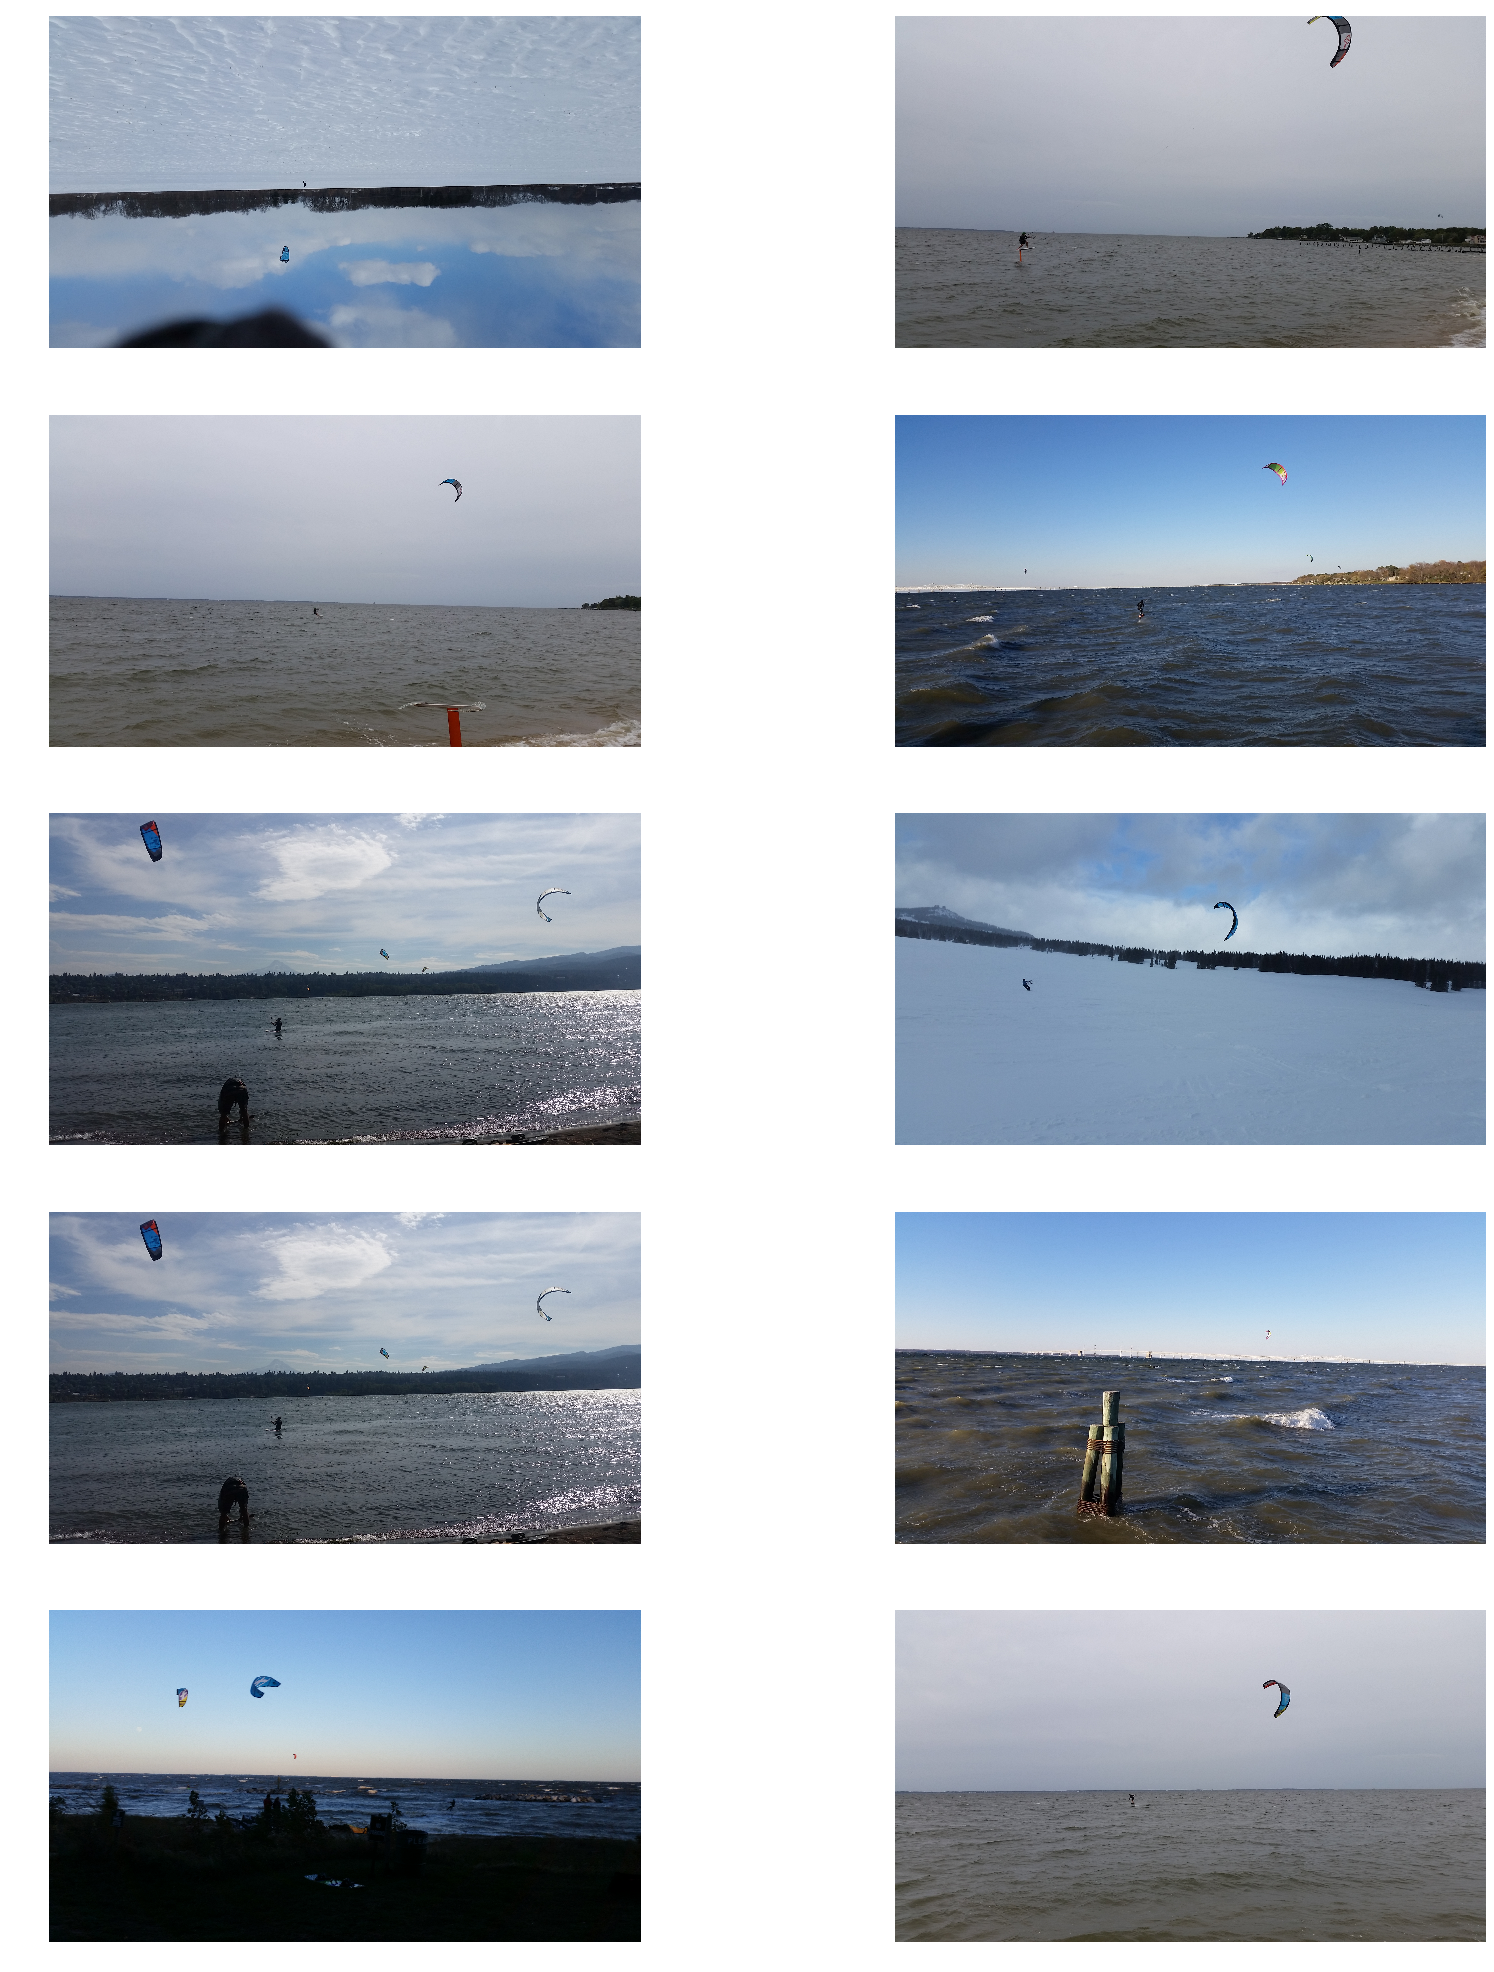

In [2]:
# use a fixed sample of images
# images sourced from filesystem or S3
import urllib

s3_url = 'https://s3.amazonaws.com/beavercreekconsulting.com/kite-detector/training-kite-detector/data-set-one/raw-images/kite/%s'

def raw_images_url(filenames):
    images = []
    for filename in filenames:
        url = s3_url % filename
        resp = urllib.urlopen(url)
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        images.append(image)
    return images
    
    
local_dir = '/home/marty/training-kite-detector/data-set-one/raw-images/kite/%s'

def raw_images_filesystem(filenames):
    filenames = [local_dir % name for name in filenames]
    images = []
    for filename in filenames:
        image = cv2.imread(filename)
        images.append(image)
    return images


# For a sample of raw images
filenames = ['20150219_151842.jpg', '20150925_174219.jpg', '20150925_174115.jpg', 
             '20151113_152505.jpg', '20150827_153839.jpg', '20150225_145526.jpg', 
             '20150827_153839.jpg', '20151113_152122.jpg', '20141006_180437.jpg', 
             '20150925_174210.jpg']

# load from file system
# images = raw_images_filesystem(filenames)

# load from S3
images = raw_images_url(filenames)


plt.figure(figsize=(20, 30))
cols = 2
rows = (len(images) / cols) + 1 
for i in range(len(images)):
    plt.subplot(rows, cols, i + 1)
    img = images[i]
    img_to_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_to_plt)
    plt.axis('off')
    
plt.show()
